In [ ]:
# Traffic Prediction: Linear Regression and SVM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import seaborn as sns

In [ ]:
# Step 1: Load Dataset
df = pd.read_csv("traffic.csv")

df.head()
print(df.columns)

Index(['X', 'Y', 'OBJECTID', 'DISTRICT', 'ROUTE', 'ROUTE_SFX', 'COUNTY',
       'PM_PFX', 'PM', 'PM_SFX', 'LOCATION_DESCRIPTION', 'BACK_PEAK_HOUR',
       'BACK_PEAK_MADT', 'BACK_AADT', 'AHEAD_PEAK_HOUR', 'AHEAD_PEAK_MADT',
       'AHEAD_AADT'],
      dtype='object')


In [ ]:
# Step 2: Data Preprocessing
# Define features and target variable
feature_columns = ['X', 'Y', 'ROUTE', 'PM', 'BACK_PEAK_HOUR', 'AHEAD_PEAK_HOUR']
target_column = 'AHEAD_AADT'  # Change to 'BACK_AADT' if analyzing back direction

X = df[feature_columns]
y = df[target_column]

# Handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Step 6: Neural Network Model
# Define the model architecture
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))  # Output layer

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=100,  # Adjust epochs as needed
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Predictions using Neural Network
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Step 7: Evaluation Metrics
# Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mape_linear = np.mean(np.abs((y_test - y_pred_linear) / y_test)) * 100

# Neural Network
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mape_nn = np.mean(np.abs((y_test - y_pred_nn) / y_test)) * 100

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9446876160.0000 - val_loss: 8949259264.0000
Epoch 2/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9430222848.0000 - val_loss: 8418179584.0000
Epoch 3/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8747948032.0000 - val_loss: 7151078912.0000
Epoch 4/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7199796736.0000 - val_loss: 5294451200.0000
Epoch 5/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5083943424.0000 - val_loss: 3403463424.0000
Epoch 6/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3294226432.0000 - val_loss: 2061190144.0000
Epoch 7/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2066965760.0000 - val_loss: 1361014528.0000
Epoch 8/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1625929472.0000 - val_loss: 1028797376.0000
Epoch 9/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1135253120.0000 - val_loss: 835370944.0000
Epoch 10/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 953406

In [ ]:
# Step 8: Print Results
print("Linear Regression Performance:")
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"R² Score: {r2_linear:.2f}")
print(f"MAPE: {mape_linear:.2f}%\n")

print("Neural Network Performance:")
print(f"Mean Squared Error: {mse_nn:.2f}")
print(f"R² Score: {r2_nn:.2f}")
print(f"MAPE: {mape_nn:.2f}%\n")

Linear Regression Performance:
Mean Squared Error: 244132863.03
R² Score: 0.95
MAPE: 74.37%

Neural Network Performance:
Mean Squared Error: 257423739.42
R² Score: 0.95
MAPE: 63.13%



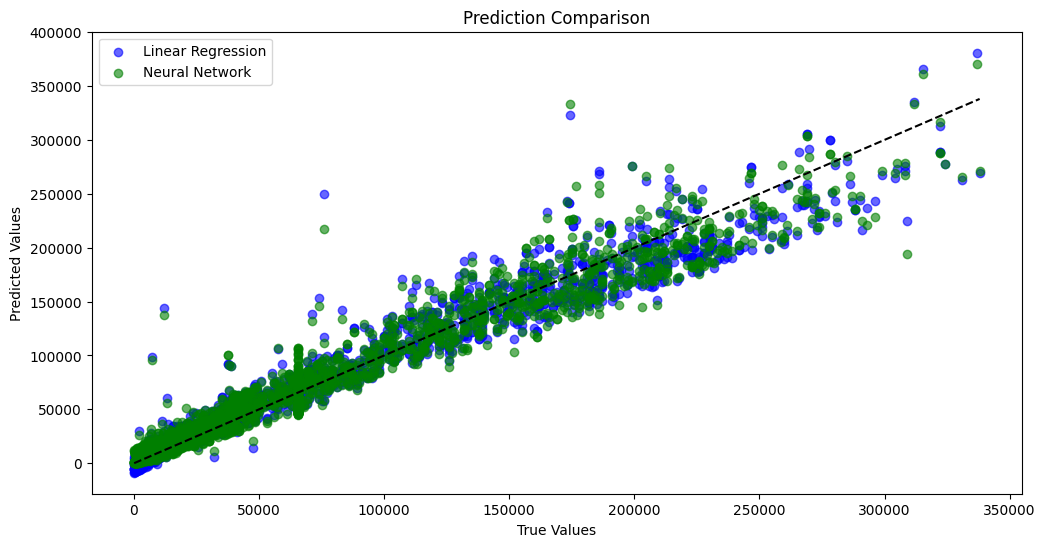

In [ ]:
# Step 9: Visualization
# Scatter Plot: Prediction Comparison
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_pred_nn, color='green', alpha=0.6, label='Neural Network')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Prediction Comparison")
plt.legend()
plt.show()

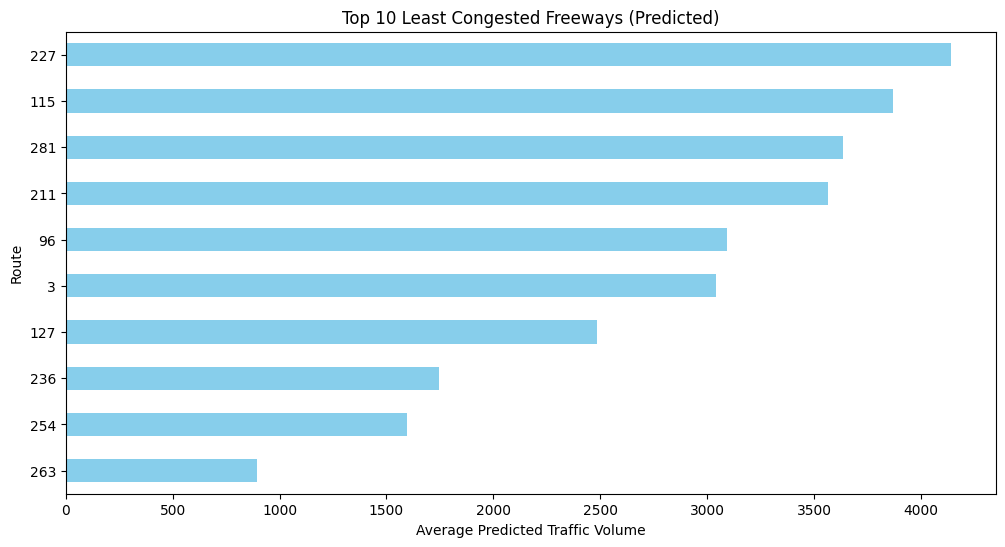

In [ ]:
# Bar Chart: Least Congested Routes
X_test['Predicted Volume'] = y_pred_nn
route_traffic = X_test.groupby('ROUTE')['Predicted Volume'].mean().sort_values()

plt.figure(figsize=(12, 6))
route_traffic.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Least Congested Freeways (Predicted)")
plt.xlabel("Average Predicted Traffic Volume")
plt.ylabel("Route")
plt.show()

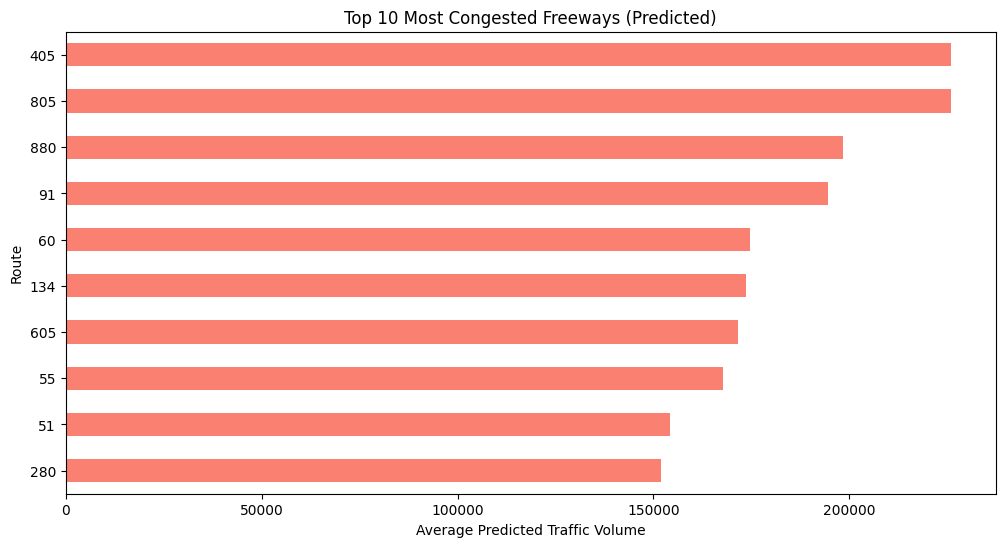

In [ ]:
# Bar Chart: Most Congested Routes
# Group by route and calculate average predicted traffic volume
route_traffic_most_congested = X_test.groupby('ROUTE')['Predicted Volume'].mean().sort_values(ascending=False)

# Plot the top 10 most congested routes
plt.figure(figsize=(12, 6))
route_traffic_most_congested.head(10).plot(kind='barh', color='salmon')
plt.title("Top 10 Most Congested Freeways (Predicted)")
plt.xlabel("Average Predicted Traffic Volume")
plt.ylabel("Route")
plt.gca().invert_yaxis()  # Invert the y-axis to have the most congested at the top
plt.show()

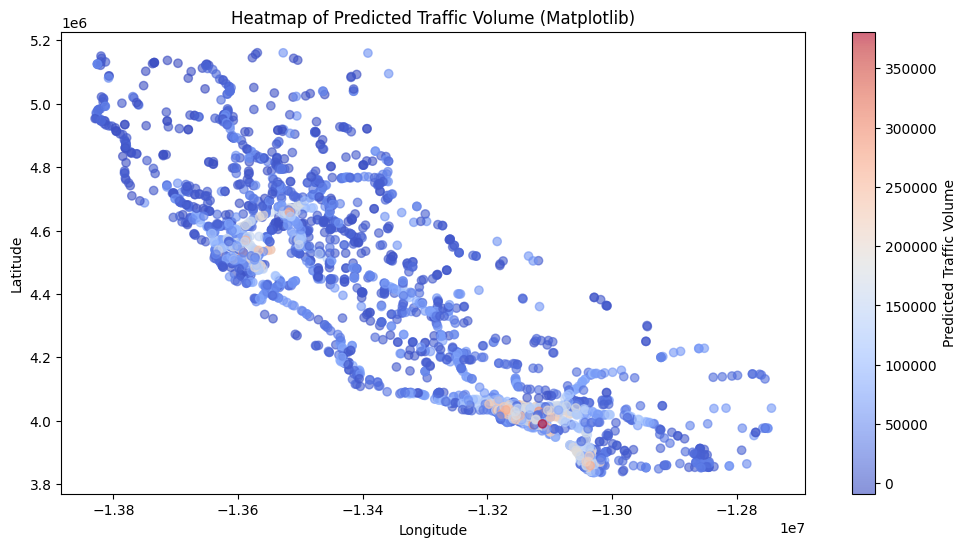

In [41]:
# Heatmap
results_df = pd.DataFrame({
    'Longitude': X_test['X'],           # Longitude from test data
    'Latitude': X_test['Y'],            # Latitude from test data
    'True Values': y_test,              # True traffic volume
    'Predicted Values': y_pred_linear
})

plt.figure(figsize=(12, 6))
# Scatter plot with a color mapping for predicted traffic volume
sc = plt.scatter(
    results_df['Longitude'],       # Longitude values
    results_df['Latitude'],        # Latitude values
    c=results_df['Predicted Values'],  # Use 'Predicted Values' for coloring
    cmap='coolwarm',               # Color map for traffic volume
    alpha=0.6                      # Transparency
)

# Add a colorbar to indicate traffic volume levels
cbar = plt.colorbar(sc)
cbar.set_label("Predicted Traffic Volume")

# Add titles and labels
plt.title("Heatmap of Predicted Traffic Volume (Matplotlib)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()